In [55]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Defining a linear supply function for example
def demand(p,t):
    return (p+20)/1.5+t

# Defining a linear supply function for example
def demand_2(p,t):
    return (p)/t

def demand_2(p,t):
    return (p)/t



# Defining a linear demand function for example
def supply(p):
    return ((100-p)/1.25)

# Defining a function that creates a plot
def create_ax():
                fig, ax = plt.subplots( figsize=(10, 7))
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

# Defining symbols in sympy
p,x,t = sp.symbols('p,x, t', real=True, positive=True)


# Solving the equations for market equilibrium and storing it in a dictionary
equ = sp.Eq (demand(x,0),supply(x))

equ


x_eq=sp.solve(equ,x)
x_eq=float(x_eq[0])
x_eq

p_eq =demand(x_eq,0)
p_eq

producer_surplus=sp.integrate(p_eq-supply(x),(x,x_eq))
producer_surplus

consumer_surplus=sp.integrate(demand(x,0)-p_eq,(x,0,x_eq))
consumer_surplus

tax_revenue=sp.integrate(demand(x,4)-demand(x,0),(x,0,x_eq))
# Ikke sikker på hvorfor denne ble slik
tax_revenue


equ_t5 = sp.Eq(demand(x,5),supply(x))
# løser likningen for x
x_eq_t5 = sp.solve(equ_t5,x)
# konverterer til float
x_eq_t5 = float(x_eq_t5[0])
# finner likevektsprisen
p_eq_t5=supply(x_eq_t5)
# finner dødvektstapet
q2 = np.linspace(0,x_eq_t5,100)
# finner avgiftsproveny
q3 = np.linspace(x_eq,x_eq_t5,100)








# new equilibrium
equ_2 = sp.Eq(demand(x,0)+demand_2(x,4),supply(x))
x_eq_2=sp.solve(equ_2,x)
x_eq_2=float(x_eq_2[0])
p_eq_2 =demand(x_eq_2,0)+demand_2(x_eq_2,4)

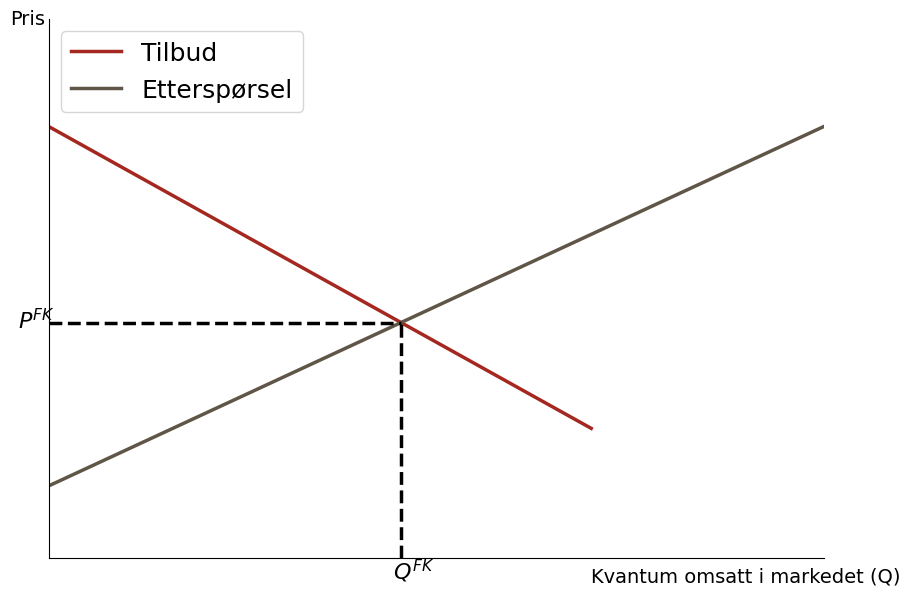

In [50]:
# I know doing it like this is not the best way, but time is running short
x_num=np.linspace(0.1,100,100)

x_num_2 = np.linspace(0.1,70,100) 
# Creating a plot from the function
fig, ax = create_ax()

# Plotting the supply and demand functions
ax.plot(x_num_2,supply(x_num_2) ,label='Tilbud', color='#A42820', linewidth=2.5)
ax.plot(x_num,demand(x_num,0) ,label='Etterspørsel', color='#5F5647', linewidth=2.5)

#ax.plot(x_num,demand(x_num,5) ,label='Etterspørsel med turistskatt', color='darkslategray')


# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black', linewidth=2.5)
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black', linewidth=2.5)


# make new line for equilibrium with tax
# ax.vlines(x_eq_t5, 0, p_eq_t5, linestyles='dashed', color='black')
# ax.hlines(p_eq_t5, 0, x_eq_t5, linestyles='dashed', color='black')


# make an arrow pointing to the new equilibrium
#ax.annotate("", xy=(50, 47), xytext=(42, 60),
#            arrowprops=dict(arrowstyle='->', color='black',linewidth=3),
#            annotation_clip=False)


# remove the x and y ticks
ax.set_xticks([])
ax.set_yticks([])
# x-axis label
ax.text(70, -4.5, 'Kvantum omsatt i markedet (Q)', fontsize=14)
# y-axis label
ax.text(-5, 99, 'Pris', fontsize=14)

# X1
ax.text(x_eq-1, -4, '$Q^{FK}$', fontsize=16)
# P1
ax.text(-4, p_eq-1, '$P^{FK}$', fontsize=16)

# make the y axis go to 400
ax.set_ylim(0,100)


# X2
#ax.text(x_eq_t5-1, -2.5, '$Q^{SO}$', fontsize=10)
# P2
#ax.text(-3.5, p_eq_t5-1, '$P^{SO}$', fontsize=10)
# Defining q as a numpy array

q= np.linspace(0.1,x_eq,100)


ax.legend(loc='upper left', fontsize=18)


# filling the deadweight loss
#ax.fill_between(q3,supply(q3),demand(q3,0), color = 'grey', label='Dødsvektstap')
plt.savefig('dokumentobjekter/figurer/market_eq.png')

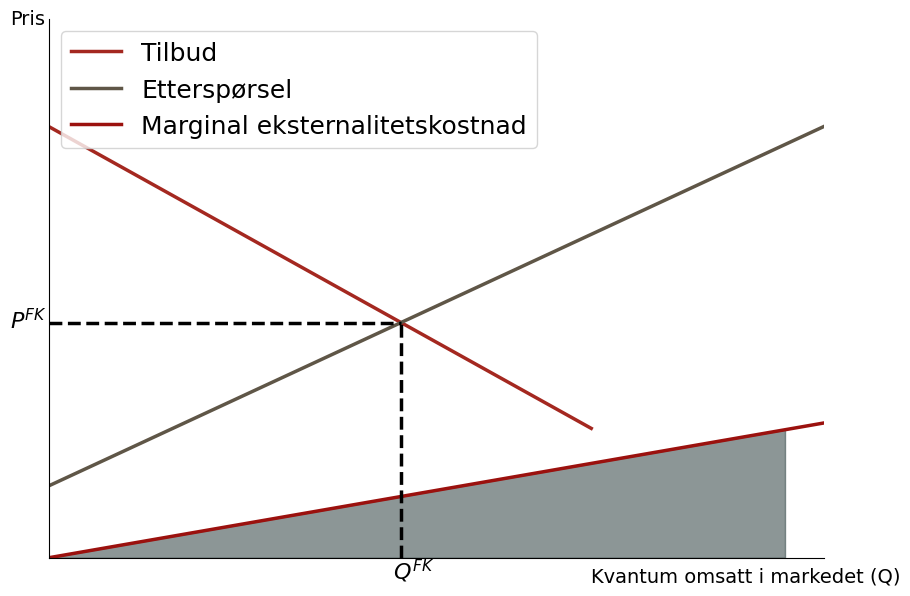

In [94]:

x_num=np.linspace(0.1,100,100)
x_num_2=np.linspace(0.1,70,100)
# Creating a plot from the function
fig, ax = create_ax()

# Plotting the supply and demand functions
ax.plot(x_num_2,supply(x_num_2) ,label='Tilbud', color='#A42820', linewidth=2.5)
ax.plot(x_num,demand(x_num,0) ,label='Etterspørsel', color='#5F5647', linewidth=2.5)

x_num_3 = np.linspace(0.1,95,100)
# marginal eksternal kostnad
ax.plot(x_num,demand_2(x_num,4) ,label='Marginal eksternalitetskostnad', color='#9B110E', linewidth=2.5)

# Intgrere under marginal ekstreanlitetskostnad
ax.fill_between(x_num_3,demand_2(x_num_3,4),0, color = '#3F5151', alpha=0.6)

# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black', linewidth=2.5)
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black', linewidth=2.5)


# make new line for equilibrium with tax
# ax.vlines(x_eq_t5, 0, p_eq_t5, linestyles='dashed', color='black')
# ax.hlines(p_eq_t5, 0, x_eq_t5, linestyles='dashed', color='black')


# make an arrow pointing to the new equilibrium
#ax.annotate("", xy=(50, 47), xytext=(42, 60),
#            arrowprops=dict(arrowstyle='->', color='black',linewidth=3),
#            annotation_clip=False)


# remove the x and y ticks
ax.set_xticks([])
ax.set_yticks([])
# x-axis label
ax.text(70, -4.5, 'Kvantum omsatt i markedet (Q)', fontsize=14)
# y-axis label
ax.text(-5, 99, 'Pris', fontsize=14)

# X1
ax.text(x_eq-1, -4, '$Q^{FK}$', fontsize=16)
# P1
ax.text(-5, p_eq-1, '$P^{FK}$', fontsize=16)

# make the y axis go to 100
ax.set_ylim(0,100)


# X2
#ax.text(x_eq_t5-1, -2.5, '$Q^{SO}$', fontsize=10)
# P2
#ax.text(-3.5, p_eq_t5-1, '$P^{SO}$', fontsize=10)
# Defining q as a numpy array

q= np.linspace(0.1,x_eq,100)


ax.legend(loc='upper left', fontsize=18)


# filling the deadweight loss
#ax.fill_between(q3,supply(q3),demand(q3,0), color = 'grey', label='Dødsvektstap')
plt.savefig('dokumentobjekter/figurer/market_eq_2.png')

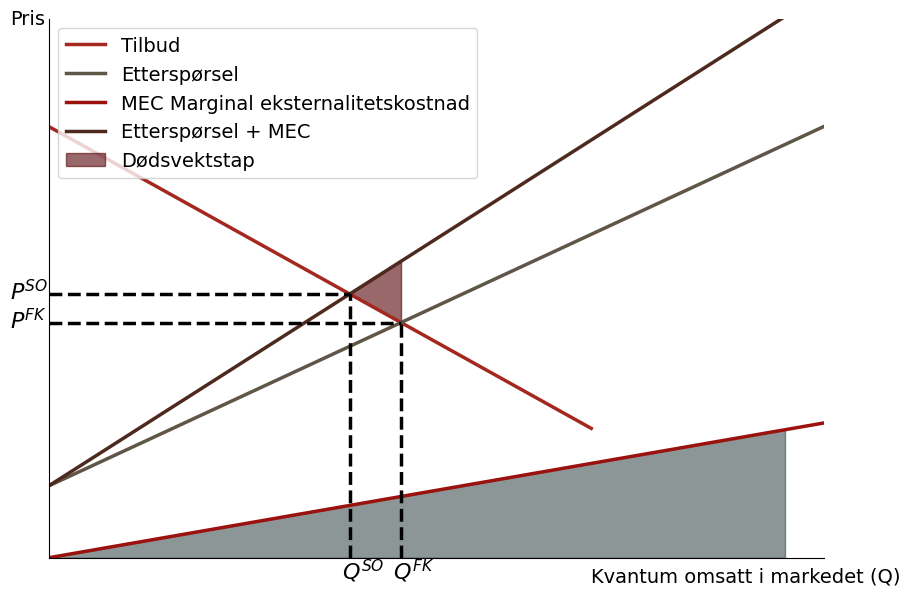

In [93]:

x_num=np.linspace(0.1,100,100)
x_num_2=np.linspace(0.1,70,100)
# Creating a plot from the function
fig, ax = create_ax()

# Plotting the supply and demand functions
ax.plot(x_num_2,supply(x_num_2) ,label='Tilbud', color='#A42820', linewidth=2.5)
ax.plot(x_num,demand(x_num,0) ,label='Etterspørsel', color='#5F5647', linewidth=2.5)

x_num_3 = np.linspace(0.1,95,100)
# marginal eksternal kostnad
ax.plot(x_num,demand_2(x_num,4) ,label='MEC Marginal eksternalitetskostnad', color='#9B110E', linewidth=2.5)

# Marginal ekstrernal kostnad + demand
ax.plot(x_num,demand(x_num,0)+demand_2(x_num,4) ,label='Etterspørsel + MEC', color='#4E2A1E', linewidth=2.5)

# vline to eq with kostnad + demand
ax.vlines(x_eq_2, 0, p_eq_2, linestyles='dashed', color='black', linewidth=2.5)
ax.hlines(p_eq_2, 0, x_eq_2, linestyles='dashed', color='black', linewidth=2.5)

# Q2
ax.text(x_eq_2-1, -4, '$Q^{SO}$', fontsize=16)
# P1
ax.text(-5, p_eq_2-1, '$P^{SO}$', fontsize=16)


x_num_4=np.linspace(x_eq,x_eq_2,100)
# integrate the deadweight between the two equilibriums
ax.fill_between(x_num_4,demand(x_num_4,0)+demand_2(x_num_4,4),supply(x_num_4), color = '#550307', alpha=0.6, label='Dødsvektstap')



# Intgrere under marginal ekstreanlitetskostnad
ax.fill_between(x_num_3,demand_2(x_num_3,4),0, color = '#3F5151', alpha=0.6)

# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black', linewidth=2.5)
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black', linewidth=2.5)





# remove the x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# x-axis label
ax.text(70, -4.5, 'Kvantum omsatt i markedet (Q)', fontsize=14)
# y-axis label
ax.text(-5, 99, 'Pris', fontsize=14)

# X1
ax.text(x_eq-1, -4, '$Q^{FK}$', fontsize=16)
# P1
ax.text(-5, p_eq-1, '$P^{FK}$', fontsize=16)

# make the y axis go to 100
ax.set_ylim(0,100)

ax.legend(loc='upper left', fontsize=14)


plt.savefig('dokumentobjekter/figurer/market_eq_3.png')